<a href="https://colab.research.google.com/github/elvispletsch/bibliotecapandas/blob/main/Projeto_de_Modelos_Preditivos_INFNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Avg_Area_Income  Avg_Area_House_Age  Avg_Area_Number_of_Rooms  \
0     79545.458574            5.682861                  7.009188   
1     79248.642455            6.002900                  6.730821   
2     61287.067179            5.865890                  8.512727   
3     63345.240046            7.188236                  5.586729   
4     59982.197226            5.040555                  7.839388   

   Avg_Area_Number_of_Bedrooms  Area_Population         Price Price_Category  
0                         4.09     23086.800503  1.059034e+06              0  
1                         3.09     40173.072174  1.505891e+06              1  
2                         5.13     36882.159400  1.058988e+06              0  
3                         3.26     34310.242831  1.260617e+06              1  
4                         4.23     26354.109472  6.309435e+05              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column

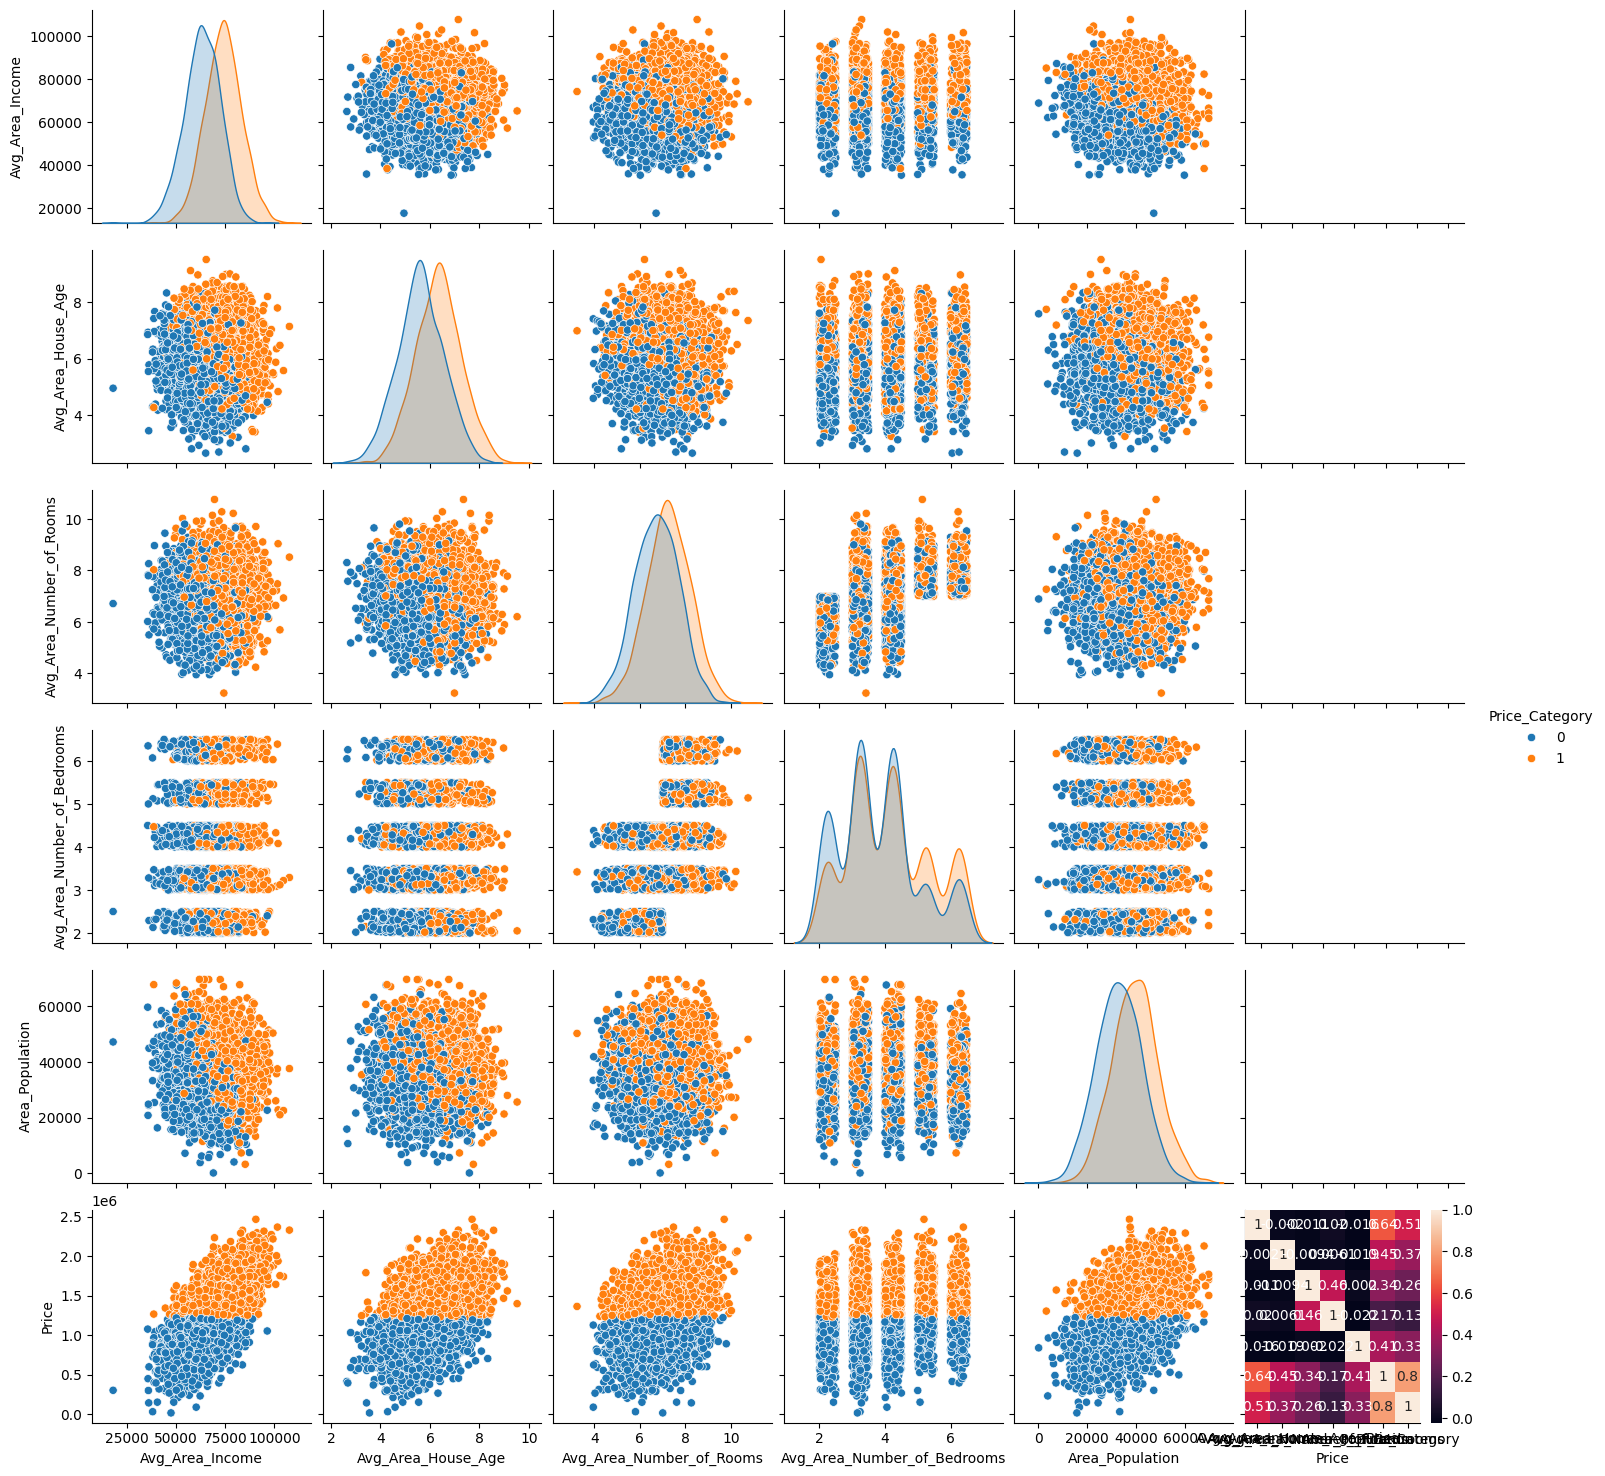

(3500, 5)
(1500, 5)
(3500,)
(1500,)
Logistic Regression: (0.5153333333333333, 0.5140374331550802, 1.0, 0.6790286975717439, array([[  4, 727],
       [  0, 769]]))
Decision Tree: (0.834, 0.8385416666666666, 0.8374512353706112, 0.837996096291477, array([[607, 124],
       [125, 644]]))
Random Forest: (0.8753333333333333, 0.8818897637795275, 0.8738621586475943, 0.8778576094056172, array([[641,  90],
       [ 97, 672]]))
Neural Network: (0.534, 0.5244072524407253, 0.9778933680104032, 0.6827054017249206, array([[ 49, 682],
       [ 17, 752]]))
Logistic Regression Prediction: 1
Decision Tree Prediction: 1
Random Forest Prediction: 0
Neural Network Prediction: 0


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import plotly.express as px

# Carregar a base de dados
base_casa = pd.read_csv("USA_Housing.csv", sep=",")
base_casa = base_casa.rename(columns={
    "Avg. Area Income": "Avg_Area_Income",
    "Avg. Area House Age": "Avg_Area_House_Age",
    "Avg. Area Number of Rooms": "Avg_Area_Number_of_Rooms",
    'Avg. Area Number of Bedrooms': "Avg_Area_Number_of_Bedrooms",
    'Area Population': "Area_Population"
})

# Remover a coluna 'Address' que não será utilizada
base_casa.drop(["Address"], axis=1, inplace=True)

# Converter a variável de regressão (Price) em uma variável categórica para classificação
base_casa['Price_Category'] = pd.qcut(base_casa['Price'], q=2, labels=[0, 1])  # 0 para preços baixos, 1 para preços altos

# Visualizar as primeiras linhas do dataset
print(base_casa.head())

# Informações do dataset
print(base_casa.info())

# Estatísticas descritivas
print(base_casa.describe())

# Box plot para visualizar a distribuição de uma variável
fig = px.box(base_casa, x="Avg_Area_Income")
fig.update_traces(line_color="blue")
fig.show()

# Pairplot
sns.pairplot(base_casa, hue='Price_Category')

# Heatmap de correlação
sns.heatmap(base_casa.corr(), annot=True)
plt.show()

# Separação dos dados em treino e teste
X = base_casa[['Avg_Area_Income', 'Avg_Area_House_Age', 'Avg_Area_Number_of_Rooms', 'Avg_Area_Number_of_Bedrooms', 'Area_Population']]
Y = base_casa['Price_Category']

# Balanceamento das classes usando SMOTE
smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, train_size=0.7, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

# Função para avaliar o modelo
def avaliar_modelo(modelo, X_test, Y_test):
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return accuracy, precision, recall, f1, cm

# Regressão Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_reg_metrics = avaliar_modelo(log_reg, X_test, Y_test)

# Árvore de Decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
tree_metrics = avaliar_modelo(tree, X_test, Y_test)

# Random Forest
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)
forest_metrics = avaliar_modelo(forest, X_test, Y_test)

# Rede Neural rasa
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, Y_train)
mlp_metrics = avaliar_modelo(mlp, X_test, Y_test)

# Exibir métricas de avaliação
print("Logistic Regression:", log_reg_metrics)
print("Decision Tree:", tree_metrics)
print("Random Forest:", forest_metrics)
print("Neural Network:", mlp_metrics)

# Premissa de predição de qual será o preço baseado nas condições abaixo
Entrada = pd.DataFrame({
    'Avg_Area_Income': [50],
    'Avg_Area_House_Age': [15],
    'Avg_Area_Number_of_Rooms': [6],
    'Avg_Area_Number_of_Bedrooms': [3],
    'Area_Population': [300]
})

pred_log_reg = log_reg.predict(Entrada)[0]
pred_tree = tree.predict(Entrada)[0]
pred_forest = forest.predict(Entrada)[0]
pred_mlp = mlp.predict(Entrada)[0]

print(f"Logistic Regression Prediction: {pred_log_reg}")
print(f"Decision Tree Prediction: {pred_tree}")
print(f"Random Forest Prediction: {pred_forest}")
print(f"Neural Network Prediction: {pred_mlp}")
